## Curve Fitting

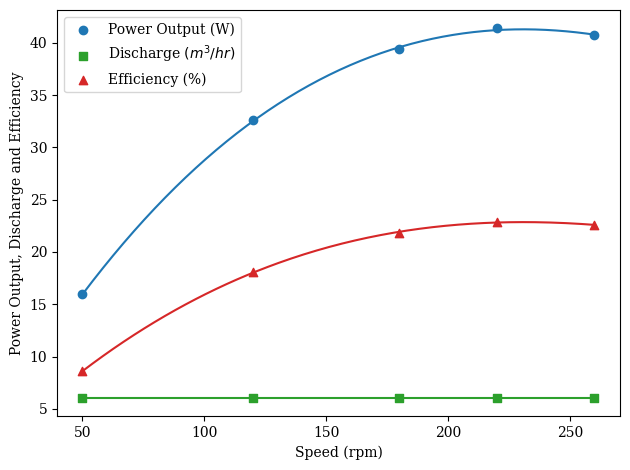

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif']

# Data
rpm = np.array([260,220,180,120,50])
P_out = np.array([40.724,41.36,39.4,32.58,15.94])
Q = np.array([6.05]*5)
Eff = np.array([22.56,22.9,21.83,18.06,8.60])


# Data to x,y1,y2...
x=rpm
y1=P_out
y2=Q
y3=Eff

# Plot labels
y1_label= 'Power Output (W)'
y2_label= 'Discharge $(m^3/hr)$'
y3_label= 'Efficiency (%)'

# axes labels
x_label= 'Speed (rpm)'
y_label='Power Output, Discharge and Efficiency'


# Curve fits (3rd degree polynomial)
coeffs1 = np.polyfit(x, y1, 3)
coeffs2 = np.polyfit(x, y2, 3)
coeffs3 = np.polyfit(x, y3, 3)

poly_bsfc = np.poly1d(coeffs1)
poly_lube = np.poly1d(coeffs2)
poly_exhaust = np.poly1d(coeffs3)

# Fine x axis for smooth curves
x_fit = np.linspace(x.min(), x.max(), 200)

# Create figure and axes
fig, ax = plt.subplots()

# Plot data points
ax.scatter(x, y1, color='tab:blue', marker='o', label=y1_label)
ax.scatter(x, y2, color='tab:green', marker='s', label=y2_label)
ax.scatter(x, y3, color='tab:red', marker='^', label=y3_label)


# Plot fitted curves
ax.plot(x_fit, poly_bsfc(x_fit), color='tab:blue', linestyle='-')
ax.plot(x_fit, poly_lube(x_fit), color='tab:green', linestyle='-')
ax.plot(x_fit, poly_exhaust(x_fit), color='tab:red', linestyle='-')

# Labels
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)


# Legends
ax.legend()

# # Add Gridlines
# plt.grid(which='both', axis='both', linestyle='-', linewidth=0.5)

# plt.title('bsfc, lube, and exhaust vs brake power with Curve Fits')
plt.tight_layout()
plt.savefig('my_figure1.png', dpi=600)
plt.show()
